<b><u> Objectives of feature engineering </u></b>
<ol>
    <li> Find and understand patterns in data </li>
    <li> Handling cateogircal values </li>
    <li> Handle missing data </li>
    <li> Find most important features for predicition</li>
    <li> Normalization and Standardization of data </li>
</ol>

The significance level, or alpha(${\alpha}$), is the probability of rejecting our null hypothesis when it actually holds true. In other terms, it’s the probability of making a Type I error.

Typically, one should weigh the costs of making a Type I vs. a Type II error to determine the best alpha for an experiment.

In [163]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import math
from scipy import stats
from scipy.stats import chi2_contingency

import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv("loan.csv")
data.head(8)
#Co-applicant : Someone who applies with you for the loan
#Applicant Income: Monthly (in USD)
#Loan_Amount_Term : Time to payback loan (in months)
#Loan amount: in 100k usd

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N


In [5]:
data.shape

(614, 13)

In [7]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [21]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [24]:
data.describe(include = "object")

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


In [ ]:
cat_column

In [20]:
pd.concat([data.isna().sum().rename("Total Null"), ((data.isna().sum()/data.shape[0]).round(3)*100).rename("perc_of_total")], 
          axis = 1)

,Total Null,perc_of_total
Loan_ID,0,0.0
Gender,13,2.1
Married,3,0.5
Dependents,15,2.4
Education,0,0.0
Self_Employed,32,5.2
ApplicantIncome,0,0.0
CoapplicantIncome,0,0.0
LoanAmount,22,3.6
Loan_Amount_Term,14,2.3


In [32]:
ct = pd.crosstab(data["Loan_Status"], data["Dependents"])
ct

Dependents,0,1,2,3+
Loan_Status,,,,
N,107,36,25,18
Y,238,66,76,33


In [33]:
chi2_contingency(ct)

(3.158339770698263,
 0.3678506740863211,
 3,
 array([[107.12854758,  31.67278798,  31.36227045,  15.83639399],
        [237.87145242,  70.32721202,  69.63772955,  35.16360601]]))

In [52]:
data.drop("Dependents_2", axis = 1, inplace = True)
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [55]:
data["Dependents_2"] = data["Dependents"].replace({"0" : "0", "1" : ">0", "2" : ">0", "3+" : ">0"})
data["Dependents_2"]

0       0
1      >0
2       0
3       0
4       0
       ..
609     0
610    >0
611    >0
612    >0
613     0
Name: Dependents_2, Length: 614, dtype: object

In [56]:
data["Dependents_2"].value_counts()

0     345
>0    254
Name: Dependents_2, dtype: int64

In [57]:
ct1 = pd.crosstab(data["Loan_Status"], data["Dependents_2"])
ct1

Dependents_2,0,>0
Loan_Status,,
N,107,79
Y,238,175


<AxesSubplot:xlabel='Dependents_2', ylabel='count'>

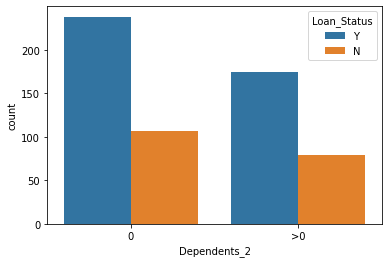

In [58]:
sns.countplot(data = data, x = "Dependents_2", hue = "Loan_Status",)

In [59]:
chi2_contingency(ct1)

(0.0,
 1.0,
 1,
 array([[107.12854758,  78.87145242],
        [237.87145242, 175.12854758]]))

### <center><u> Assignments - Feature Engg. 1-2</u></center>

**Q.** We believe that the loan.csv data shows that unmarried men are in a different income group than both married and unmarried women. To prove this, would a t-test be more appropriate or a chi-square test?
Carry out the test on the 'ApplicantIncome' column for the two groups and report the p-value. Also report your interpretation.

In [168]:
loan = pd.read_csv("loan.csv")
unmarried_men = loan[(loan["Gender"] == "Male") & (loan["Married"] == "No")]
women = loan[loan["Gender"] == "Female"]
print(unmarried_men["ApplicantIncome"].isna().sum() + women["ApplicantIncome"].isna().sum())

0


In [86]:
from scipy.stats import ttest_ind

ttest_ind(unmarried_men["ApplicantIncome"], women["ApplicantIncome"], alternative = "two-sided")

Ttest_indResult(statistic=1.1403012035198827, pvalue=0.2552975030762238)

**Q.** We believe that the loan.csv data shows that graduate unmarried men are in a different income group than both married and unmarried graduate women. To prove this, would a t-test be more appropriate or a chi-square test?
Carry out the test on the 'ApplicantIncome' column for the two groups and report the p-value. Also report your interpretation.

In [166]:
grad_unmarried_men = unmarried_men[unmarried_men["Education"] == "Graduate"]
grad_women = women[women["Education"] == "Graduate"]
print(grad_unmarried_men["ApplicantIncome"].isna().sum() + grad_women["ApplicantIncome"].isna().sum())

0


In [106]:
ttest_ind(grad_unmarried_men["ApplicantIncome"], grad_women["ApplicantIncome"], alternative = "two-sided")

Ttest_indResult(statistic=1.75360894634636, pvalue=0.0811185605889597)

**Q.** We believe that the loan.csv data shows that graduate unmarried men are more likely to get a loan than graduate women.
To prove this, would a t-test be more appropriate or a chi-square test?
Carry out the appropriate test on the 'Loan_Status' column for the two groups and report the p-value. Also report your interpretation.

**Ans:** Chi2 test for independence

In [165]:
temp_df_1 = grad_unmarried_men[["Loan_Status"]]
temp_df_1["Type"] = ["GUM"] * len(temp_df)
temp_df_2 = grad_women[["Loan_Status"]]
temp_df_2["Type"] = ["GW"] * len(temp_df_2)
temp_df_3 = pd.concat([temp_df_1, temp_df_2], axis = 0).reset_index(drop = True)
ct = pd.crosstab(temp_df_3["Loan_Status"], temp_df_3["Type"])
chi2_contingency(ct)

(0.14381605008456969,
 0.7045164323229686,
 1,
 array([[35.2460733, 32.7539267],
        [63.7539267, 59.2460733]]))

<AxesSubplot:xlabel='GW', ylabel='count'>

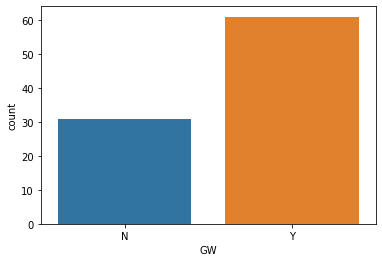

In [130]:
sns.countplot(data = temp_df, x = "GW")

<AxesSubplot:xlabel='GUM', ylabel='count'>

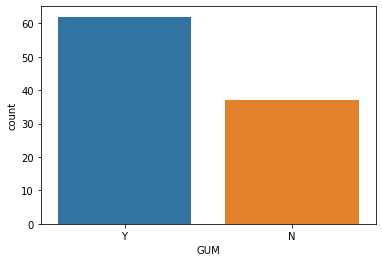

In [129]:
temp_df = pd.concat([grad_unmarried_men["Loan_Status"], grad_women["Loan_Status"]], axis = 1, ignore_index = True)
temp_df.columns = ["GUM", "GW"]
sns.countplot(data = temp_df, x = "GUM")

**Q.** Create new Feature 

In [104]:
data = pd.read_csv("loan.csv")
data.dropna(inplace = True)
data['NewFeature'] = (data["ApplicantIncome"]) + (3 * data["LoanAmount"]) + (7000 * data["Credit_History"])
avg = data['NewFeature'].mean()
data['Separator'] = (data['NewFeature'] > (0.25 * avg)).astype(int)
chi2_contingency(pd.crosstab(data['Separator'], data["Loan_Status"]))[1].round(4)

0.0001

**Q.** In the loan.csv dataset, we wish to test the hypothesis that among all loan applicants who were rejected for a loan, applicants with a credit history of 1 are more likely to be female. Use a chi-square test to verify this claim (Ensure that you drop all nan rows), and report your interpretation with LOS = 5%

In [141]:
data = pd.read_csv("loan.csv")
data.dropna(inplace = True)
data_reject = data[(data["Loan_Status"] == "N")]
ct = pd.crosstab(data_reject["Credit_History"], data_reject["Gender"])
ct

Gender,Female,Male
Credit_History,,
0.0,13,50
1.0,19,66


In [142]:
chi2_contingency(ct)

(0.0024123442480440483,
 0.9608271544968046,
 1,
 array([[13.62162162, 49.37837838],
        [18.37837838, 66.62162162]]))

**Q.** In the loan.csv dataset, we observed that among all applicants with a credit history of 1 -- 272 males and 53 females were granted loans, while 66 males and 19 females were not granted loans. We suspect a gender bias towards males here, and wish to test if there is any statistical significance to our claim. Perform a chi-square test to do so, and report your interpretations.

In [172]:
credit = data[data["Credit_History"] == 1]
ct = pd.crosstab(credit["Gender"], credit["Loan_Status"])
ct

Loan_Status,N,Y
Gender,,
Female,19,53
Male,66,272


In [173]:
chi2_contingency(ct)

(1.3089034809797073,
 0.25259328208262877,
 1,
 array([[ 14.92682927,  57.07317073],
        [ 70.07317073, 267.92682927]]))

**Q.** In the loan.csv dataset, we wish to test the hypothesis that the loan amount payable per year is different for women and unmarried men. 
1. To do so, first define a new feature called 'Loan_Amount_per_year' using the formula 'LoanAmount' / 'Loan_Amount_Term'. 
2. Next, define group1 as the women loan applicants, and group2 as the unmarried male applicants. 
3. Print out their variances. 
4. Perform a Levene test using the median as the center to check whether the variances of the two groups are significantly different.
5. Next, apply the t-test to check whether the average loan amount payable is significantly different for the two groups. What interpretations can be drawn from the tests conducted?

In [224]:
data = pd.read_csv("loan.csv")
data['Loan_Amount_per_year'] = data['LoanAmount']/data['Loan_Amount_Term']
group1 = data[data["Gender"] == "Female"]
group2 = data[(data["Gender"] == "Male") & (data["Married"] == "No")]

In [231]:
var1 = group1["Loan_Amount_per_year"].var()
var2 = group2["Loan_Amount_per_year"].var()
print(var1, var2)
print(var1/var2)
#Hence we will use Welch's T-Test

0.2254831663255799 0.1136237749653225
1.9844717040460629


In [232]:
group1.dropna(inplace = True)
group2.dropna(inplace = True)

In [235]:
from scipy.stats import levene
levene(group1["Loan_Amount_per_year"], group2["Loan_Amount_per_year"], center = "median")

LeveneResult(statistic=0.2050438718066556, pvalue=0.6511912765226734)

In [191]:
m1 = group1["Loan_Amount_per_year"].mean()
m2 = group2["Loan_Amount_per_year"].mean()
n1 = group1["Loan_Amount_per_year"].count()
n2 = group2["Loan_Amount_per_year"].count()

In [195]:
from scipy.stats import ttest_ind_from_stats
(t_stat, p_val) = ttest_ind_from_stats(m1, np.sqrt(var1), n1, m2, np.sqrt(var2), n2, equal_var = False, alternative="two-sided")

if p_val < 0.05:
    print("Null hyp rejected", p_val)
else:
    print("Fail to reject", p_val)

Fail to reject 0.8263121112719257


**Q.** In the loan.csv dataset, we wish to test the hypothesis that among all loan applicants **with a Credit_History of 1 who were rejected for a loan**, the married group of people applied for a loan amount that is significantly different from the unmarried applicants.
1. To do so, first, define group1 as the married group and group2 as the unmarried group, and retrieve their "LoanAmount" details. 
2. Drop the columns containing 'nan'.
3. Print out their variances, and perform a Levene test to check whether the variance in the loan amount for the two groups is significantly different.
4. Next, apply the Krushkal test to check if the median loan amount is significantly different for the two groups. What interpretations can you draw from the tests performed?

In [250]:
data = pd.read_csv("loan.csv")
data = data[(data["Credit_History"] == 1) & (data["Loan_Status"] == "N") ]
group1 = data[(data["Married"] == "Yes")]
group2 = data[(data["Married"] == "No")]
group1.dropna(inplace = True)
group2.dropna(inplace = True)

In [251]:
var1 = group1["LoanAmount"].var()
var2 = group2["LoanAmount"].var()
print(var1, var2)
print(var1/var2)

10478.13131313131 8454.215384615385
1.2393972517188243


In [253]:
from scipy.stats import levene
stat, p_val = levene(group1["LoanAmount"], group2["LoanAmount"], center = "median")

print("Levene P-val:", p_val)
if(p_val < 0.05):
    print("Variances are different, reject Null Hyp")
else:
    print("Variances are similar, fail to reject Null")

Levene P-val: 0.8690752996821028
Variances are similar, fail to reject Null


In [254]:
from scipy.stats import kruskal
stat, p_val = kruskal(group1["LoanAmount"], group2["LoanAmount"])

print(stat, p_val)
if(p_val < 0.05):
    print("Medians are different, reject Null Hyp")
else:
    print("Medians are similar, fail to reject Null")

5.141325559877744 0.023362803082499575
Medians are different, reject Null Hyp


**Q.** In the loan.csv dataset, we wish to test the hypothesis that among all loan applicants who were **rejected for a loan**, the **applicant income** of the people with a **credit history of 1** is significantly different from the **applicant income** of the people with a **credit history of 0**.

1. To do so, first, define group1 as the people with a credit history of 0, and group2 as the people with a credit history of 1
2. Retrieve their Applicant Income information and drop the columns containing 'nan'.
3. Next, apply the Krushkal test to check whether the mean applicant income of the two groups is significantly different, and the Levene test to check if the variance in the applicant income for the two groups is significantly different. 

What are the results of these tests, and what interpretations can you draw?

In [302]:
data = pd.read_csv("loan.csv")
data = data[data["Loan_Status"] == "N"]
group1 = data[data["Credit_History"] == 0]["ApplicantIncome"]
group2 = data[data["Credit_History"] == 1]["ApplicantIncome"]
group1.dropna(inplace = True)
group2.dropna(inplace = True)

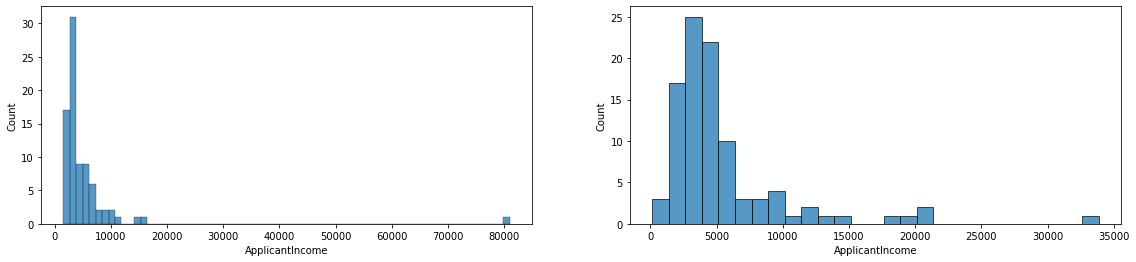

In [303]:
fig, axs = plt.subplots(1, 2, figsize = (8, 4))
sns.histplot(group1, ax = axs[0])
sns.histplot(group2, ax = axs[1])
fig.subplots_adjust(right = 2)
plt.show()

In [284]:
from scipy.stats import levene
stat, p_val = levene(group1, group2, center = "trimmed")

print("Levene P-val:", p_val)
if(p_val < 0.05):
    print("Variances are different, reject Null Hyp")
else:
    print("Variances are similar, fail to reject Null")

Levene P-val: 0.02764197697190895
Variances are different, reject Null Hyp


In [267]:
from scipy.stats import kruskal
stat, p_val = kruskal(group1, group2)

print("Kruskal P-val:", p_val)
if(p_val < 0.05):
    print("Medians are different, reject Null Hyp")
else:
    print("Medians are similar, fail to reject Null")

Kruskal P-val: 0.15224584555807225
Medians are similar, fail to reject Null


**IMP: Kruskal Wallis is not a test for medians. We can only compare medians if the sample distributions are similar(size, loca, variance). Below is an example**

[Note: KW Test in detail](https://towardsdatascience.com/kruskal-wallis-test-for-beginners-4fe9b0333b31)

In [297]:
a1 = np.append(np.arange(-11, 1), [0] * 11)
a2 = np.append(np.arange(0, 11), [0] * 11)
print(np.median(a1), np.median(a2))

0.0 0.0


In [299]:
from scipy.stats import kruskal
kruskal(a1, a2)

KruskalResult(statistic=19.906089657034848, pvalue=8.134081626495538e-06)